<a href="https://colab.research.google.com/github/ylmgrbzz/Hitters-Data-Analysis-with-Machine-Learning-Ridge-Regression/blob/main/Hitters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd 
import seaborn as sns
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge
from sklearn import model_selection
from sklearn.linear_model import RidgeCV

In [2]:
df=pd.read_csv("Hitters.csv")

In [3]:
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N


In [5]:
df=df.dropna()
df

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.0,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,497,127,7,65,48,37,5,2703,806,32,379,311,138,N,E,325,9,3,700.0,N
318,492,136,5,76,50,94,12,5511,1511,39,897,451,875,A,E,313,381,20,875.0,A
319,475,126,3,61,43,52,6,1700,433,7,217,93,146,A,W,37,113,7,385.0,A
320,573,144,9,85,60,78,8,3198,857,97,470,420,332,A,E,1314,131,12,960.0,A


In [7]:
dms= pd.get_dummies(df[["League","Division","NewLeague"]])
dms

,League_A,League_N,Division_E,Division_W,NewLeague_A,NewLeague_N
1,0,1,0,1,0,1
2,1,0,0,1,1,0
3,0,1,1,0,0,1
4,0,1,1,0,0,1
5,1,0,0,1,1,0
...,...,...,...,...,...,...
317,0,1,1,0,0,1
318,1,0,1,0,1,0
319,1,0,0,1,1,0
320,1,0,1,0,1,0


In [8]:
y=df["Salary"]
x_=df.drop(["Salary","League","Division","NewLeague"],axis=1).astype("float64")
x=pd.concat([x_,dms[["League_N","Division_W","NewLeague_N"]]],axis=1)
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25, random_state=42)

In [10]:
df.head()


,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.0,A


In [11]:
df.shape

(263, 20)

In [19]:
ridge_model=Ridge(alpha=5).fit(x_train,y_train)


In [20]:
ridge_model

Ridge(alpha=5)

In [21]:
ridge_model.coef_

array([ -1.81040449,   8.87872786,   7.12487047,  -3.31713488,
        -2.01162162,   5.40691525,   7.25828404,  -0.13033385,
        -0.25425913,  -0.71109275,   1.81452   ,   0.77083457,
        -0.6768975 ,   0.26211894,   0.2646614 ,  -0.36947934,
        76.19519054, -90.15523668, -16.00453535])

In [22]:
ridge_model.intercept_

-3.4251968687179897

In [23]:
lambdalar=10**np.linspace(10,-2,100)*0.5

In [24]:
lambdalar

array([5.00000000e+09, 3.78231664e+09, 2.86118383e+09, 2.16438064e+09,
       1.63727458e+09, 1.23853818e+09, 9.36908711e+08, 7.08737081e+08,
       5.36133611e+08, 4.05565415e+08, 3.06795364e+08, 2.32079442e+08,
       1.75559587e+08, 1.32804389e+08, 1.00461650e+08, 7.59955541e+07,
       5.74878498e+07, 4.34874501e+07, 3.28966612e+07, 2.48851178e+07,
       1.88246790e+07, 1.42401793e+07, 1.07721735e+07, 8.14875417e+06,
       6.16423370e+06, 4.66301673e+06, 3.52740116e+06, 2.66834962e+06,
       2.01850863e+06, 1.52692775e+06, 1.15506485e+06, 8.73764200e+05,
       6.60970574e+05, 5.00000000e+05, 3.78231664e+05, 2.86118383e+05,
       2.16438064e+05, 1.63727458e+05, 1.23853818e+05, 9.36908711e+04,
       7.08737081e+04, 5.36133611e+04, 4.05565415e+04, 3.06795364e+04,
       2.32079442e+04, 1.75559587e+04, 1.32804389e+04, 1.00461650e+04,
       7.59955541e+03, 5.74878498e+03, 4.34874501e+03, 3.28966612e+03,
       2.48851178e+03, 1.88246790e+03, 1.42401793e+03, 1.07721735e+03,
      

In [28]:
ridge_model= Ridge()
katsayilar=[]
for i in lambdalar:
  ridge_model.set_params(alpha=i)
  ridge_model.fit(x_train,y_train)
  katsayilar.append(ridge_model.coef_)

In [ ]:
katsayilar

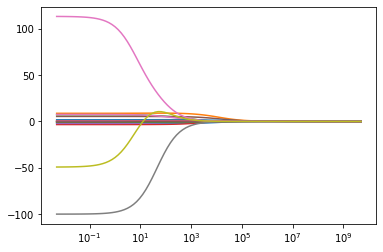

In [30]:
ax= plt.gca()
ax.plot(lambdalar,katsayilar)
ax.set_xscale("log")

In [33]:
ridge_model=Ridge().fit(x_train,y_train)

In [34]:
y_pred=ridge_model.predict(x_train)

In [35]:
y_pred[0:10]

array([ 376.25245449,  803.38498121,  496.17669652,  112.69554648,
        427.60020221, 1003.6309402 ,  153.45713944,  361.33880956,
        483.29143665,  916.91439669])

In [36]:
y_train[0:10]

183     125.0
229    1940.0
286     940.0
102     375.0
153     100.0
320     960.0
135      90.0
213     100.0
308     750.0
161     657.0
Name: Salary, dtype: float64

In [37]:
RMSE= np.sqrt(mean_squared_error(y_train,y_pred))
RMSE

289.34470696006565

In [39]:
np.sqrt(np.mean(-cross_val_score(ridge_model,x_train,y_train , cv=10 , scoring= "neg_mean_squared_error"))) #cross validation

351.3931585606316

In [41]:
y_pred= ridge_model.predict(x_test)


In [42]:
RMSE= np.sqrt(mean_squared_error(y_test,y_pred))
RMSE

356.80829057302395

In [48]:
ridge_model=Ridge(1).fit(x_train,y_train)
y_pred=ridge_model.predict(x_test)
np.sqrt(mean_squared_error(y_test,y_pred))

356.80829057302395

In [53]:
np.random.randint(0,100,10)

array([31, 56, 45, 26, 50, 81, 10, 45, 36,  1])

In [54]:
lambdalar1= np.random.randint(0,1000,100)
lambdalar2= 10**np.linspace(10,-2,100)*0,5

In [ ]:
ridgecv=RidgeCV(alphas=lambdalar2,scoring ="neg_mean_squared_error",cv=10, normalize=True)
ridgecv.fit(x_train,y_train)

In [56]:
ridgecv.alpha_

5

In [58]:
ridge_tuned= Ridge(alpha=ridgecv.alpha_).fit(x_train,y_train)

In [59]:
y_pred=ridge_tuned.predict(x_test)
np.sqrt(mean_squared_error(y_test,y_pred))

356.39391702790005

In [ ]:
ridgecv=RidgeCV(alphas=lambdalar1,scoring ="neg_mean_squared_error",cv=10, normalize=True)
ridgecv.fit(x_train,y_train)

In [61]:
ridge_tuned= Ridge(alpha=ridgecv.alpha_).fit(x_train,y_train)
y_pred=ridge_tuned.predict(x_test)
np.sqrt(mean_squared_error(y_test,y_pred))

357.0532909460746